In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# getting boston dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = df[['LSTAT']].values
y = boston_data.target

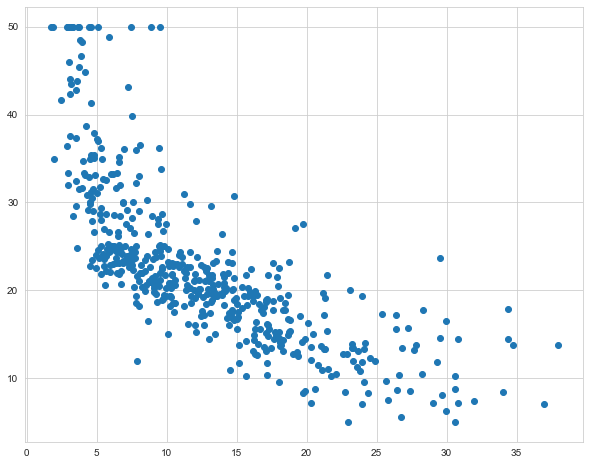

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.show()

## Without pre-processing

In [5]:
alpha = 0.0001
w = np.zeros(1 + X.shape[1])
cost = []
n_iter = 100

for i in range(n_iter):
    y_pred = np.dot(X, w[1:]) + w[0]
    errors = (y - y_pred)
    
    w[1:] += alpha * X.T.dot(errors)
    w[0] += alpha * errors.sum()
    
    c = (errors** 2).sum() / 2
    cost.append(c)

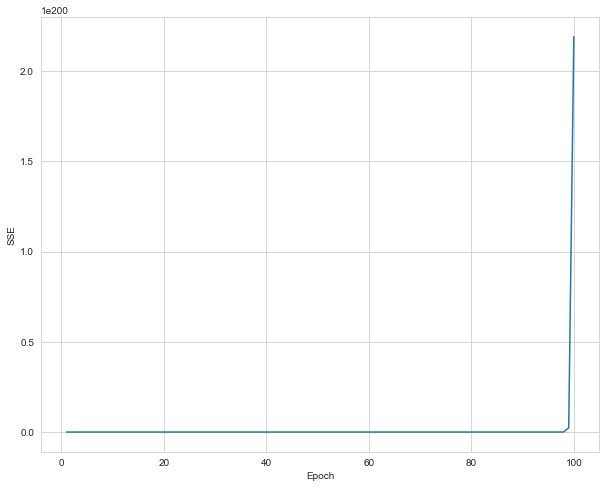

In [6]:
# plotting error
plt.figure(figsize= (10,8))
plt.plot(range(1, n_iter+1), cost)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

## With pre-processing 

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [8]:
# training 

alpha = 0.0001
w = np.zeros(1 + X_std.shape[1])
cost = []
n_iter = 100

for i in range(n_iter):
    y_pred = np.dot(X_std, w[1:]) + w[0]
    errors = (y_std - y_pred)
    
    w[1:] += alpha * X_std.T.dot(errors)
    w[0] += alpha * errors.sum()
    
    c = (errors** 2).sum() / 2
    cost.append(c)

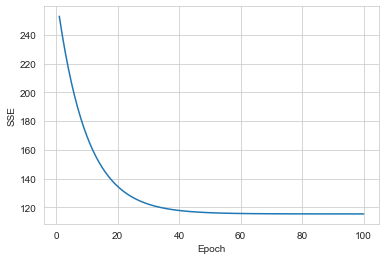

In [9]:
# plotting error
plt.figure(figsize= (6,4))
plt.plot(range(1, n_iter+1), cost)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

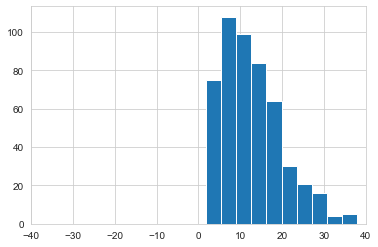

In [10]:
# Before transformation 
plt.figure(figsize= (6,4))
plt.hist(X)
plt.xlim(-40,40)
plt.show()

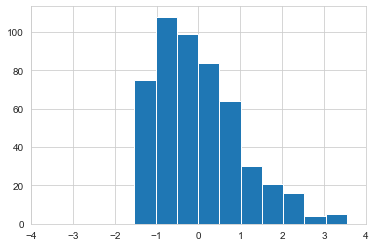

In [11]:
# After transformation 
plt.figure(figsize= (6,4))
plt.hist(X_std)
plt.xlim(-4,4)
plt.show()

# Data Pre-processing

In [12]:
from sklearn import preprocessing 

In [13]:
X_train = np.array([[1., 2., -1.], 
                    [1., 0., 2.],
                    [0., 1., 1.]])

In [14]:
X_train

array([[ 1.,  2., -1.],
       [ 1.,  0.,  2.],
       [ 0.,  1.,  1.]])

In [15]:
X_train.mean(axis= 0)

array([0.66666667, 1.        , 0.66666667])

## Standarization/ Mean Removal/ Variance scaling

Mean is removed, data is centered on zero, this is to remove bias

In [16]:
# scalling data 
X_scaled = preprocessing.scale(X_train)
print(X_scaled)

[[ 0.70710678  1.22474487 -1.33630621]
 [ 0.70710678 -1.22474487  1.06904497]
 [-1.41421356  0.          0.26726124]]


In [17]:
# calculation mean 
X_scaled.mean(axis= 0)   # all values should be zero

array([7.40148683e-17, 0.00000000e+00, 1.29526020e-16])

In [18]:
X_scaled.std(axis= 0)

array([1., 1., 1.])

If we scaled our training data, we must do likewise with our test data as well.

In [19]:
# scaling with scikit learn
# StandardScaler() helps to scale data
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [20]:
# getting mean 
scaler.mean_

array([0.66666667, 1.        , 0.66666667])

In [21]:
scaler.scale_

array([0.47140452, 0.81649658, 1.24721913])

In [22]:
# transform scaler
scaler.transform(X_train)

array([[ 0.70710678,  1.22474487, -1.33630621],
       [ 0.70710678, -1.22474487,  1.06904497],
       [-1.41421356,  0.        ,  0.26726124]])

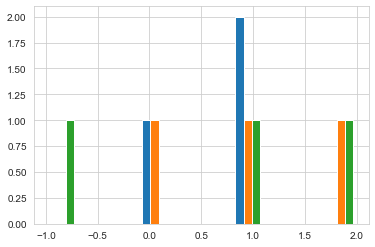

In [23]:
plt.figure(figsize= (6,4))
plt.hist(X_train)
plt.show()

In [24]:
X_test = [[-1., 1., 0.]]

In [25]:
# gtransforming test data
scaler.transform(X_test)

array([[-3.53553391,  0.        , -0.53452248]])

# Min Max Scaler

In [31]:
X_train= np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

In [32]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()

In [34]:
X_train_min_max = min_max_scaler.fit_transform(X_train)

In [35]:
X_train_min_max

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [47]:
# unseen data
X_test = np.array([[-3., -1., 0.], [2., 1.5, 4.]])

In [48]:
X_test_min_max = min_max_scaler.transform(X_test)

In [49]:
X_test_min_max

array([[0., 0., 0.],
       [1., 1., 1.]])

In [50]:
preprocessing.MinMaxScaler?

# MaxAbsScaler

In [51]:
X_train= np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

In [53]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_max_abs = max_abs_scaler.fit_transform(X_train)
print(X_train_max_abs)

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]


In [55]:
# unseen data 
X_test = np.array([[-1., 0.5, -2.], [0., 0.5, -0.6]])
X_test_max_abs = max_abs_scaler.transform(X_test)
print(X_test_max_abs)

[[-0.5  0.5 -1. ]
 [ 0.   0.5 -0.3]]


# Normalization

In [57]:
X= np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

In [59]:
X_normalized = preprocessing.normalize(X, norm='l2')
print(X_normalized)

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


In [61]:
# Alternavely
normalizer = preprocessing.Normalizer().fit(X)   # fit does nothing 
print(normalizer)

Normalizer()


In [62]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [63]:
# applying on new data 
normalizer.transform([[-1., 1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

# Binarization

In [64]:
# binarization converts whole data into 1 and 0
X= np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

In [67]:
binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing here 
binarizer

Binarizer()

In [68]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [69]:
binarizer = preprocessing.Binarizer(threshold= 1.1)

In [70]:
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [71]:
binarizer = preprocessing.Binarizer(threshold= 2.2)  # values less than threshold will be 0
binarizer.transform(X)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# Encoding Categorical Feature 

In [73]:
to_visit = ['Italy', 'Greece', 'France', 'Nepal', 'Turushko', 'Spain']

In [74]:
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(to_visit)

In [75]:
src

array([2, 1, 0, 3, 5, 4], dtype=int64)

In [78]:
print("Country to code mapping: \n")
for k, v in enumerate(label_enc.classes_):
    print(v, '\t\t', k)

Country to code mapping: 

France 		 0
Greece 		 1
Italy 		 2
Nepal 		 3
Spain 		 4
Turushko 		 5


In [79]:
label_enc.classes_

array(['France', 'Greece', 'Italy', 'Nepal', 'Spain', 'Turushko'],
      dtype='<U8')

# One hot / One-of-K encoding

In [81]:
to_visit

['Italy', 'Greece', 'France', 'Nepal', 'Turushko', 'Spain']

In [82]:
src

array([2, 1, 0, 3, 5, 4], dtype=int64)

In [86]:
dd = src.reshape(len(src), 1)
dd

array([[2],
       [1],
       [0],
       [3],
       [5],
       [4]], dtype=int64)

In [85]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

In [87]:
one_hot_enc= OneHotEncoder(sparse= False)
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


In [88]:
inverse_res = label_enc.inverse_transform([np.argmax(one_hot[0, :])])
print(inverse_res)

['Italy']


In [89]:
inverse_res = label_enc.inverse_transform([np.argmax(one_hot[3, :])])
print(inverse_res)

['Nepal']


In [90]:
inverse_res = label_enc.inverse_transform([np.argmax(one_hot[4, :])])
print(inverse_res)

['Turushko']
